# Tilastollinen merkitsevyys

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mitä tilastollinen merkitsevyys tarkoittaa?

### Johdanto

Tarkastellaan seuraavaa tuhannesta luvusta koostuvaa joukkoa. Ne voisivat olla vaikkapa jonkin kylän asukkaiden iät:

In [6]:
luvut = np.random.normal(50,20,1000).round(0)
luvut

array([ 35.,  52.,  87.,  26.,  90.,   9.,  63.,   8.,  63.,  11.,  35.,
        63.,  52.,  54.,  60.,  69.,  48.,  84.,  52.,  54.,  53.,  12.,
        47.,  75.,  50.,  53.,  31.,  94.,  81.,  45.,  63.,  30.,  40.,
        14.,  29.,  43.,  20.,  35.,  22.,  56.,  20.,  41.,  47.,  51.,
        68.,  41.,  81.,  73.,  28.,  34.,  73.,  43.,  47.,  51.,  48.,
        21.,  32.,  46.,  56.,  24.,  30.,  59.,  59.,  68.,  22.,  26.,
        45.,  38.,  47.,  48.,  29.,  47.,  19.,  70.,  90.,  31.,  33.,
        41.,  64.,  20.,  58.,  50.,  44.,  24.,  53.,  52.,  54.,  53.,
        29.,  61.,  62.,  25.,  34.,  43.,  40.,  21.,  44.,  77.,  31.,
        33.,  20.,  39.,  27.,  38.,  59.,  65.,  16.,  31.,  55.,  36.,
        59.,  62.,  77.,  79.,  27.,  62.,  25.,  27.,  40.,  75.,  62.,
        62.,  26.,  10.,  52.,  14.,  30.,  40.,  76.,  34.,  73.,  36.,
        67.,  58.,  62.,  76.,  -3.,  42.,  45.,  63.,  15.,  30.,  68.,
        75.,  59.,  36.,  49.,  68.,  66.,  34.,  4

Tämän joukon keskiarvo on:

In [7]:
ka = luvut.mean()
ka

np.float64(50.719)

Jos poimimme tästä joukosta kokoa 20 olevan otoksen ja laskemme otoksen keskiarvon, on se luultavasti lähellä koko joukon keskiarvoa, mutta tuskin täysin sama. Kokeillaan:

In [8]:
otos = np.random.choice(luvut, size=20, replace=False)
otos

array([54., 35., 88., 74., 51., 43., 35.,  5., 60., 20., 44., 45., 58.,
       18., 59., 45., 35., 62., 51., 48.])

Tämän otoksen keskiarvo on:

In [9]:
otos.mean()

np.float64(46.5)

In [10]:
print(f'Koko populaation keskiarvo on siis {ka:.1f} ja otoksen keskiarvo on {otos.mean():.1f}.')

Koko populaation keskiarvo on siis 50.7 ja otoksen keskiarvo on 46.5.


Poimitaan nyt useita kokoa 20 olevia otoksia ja tarkastellaan näiden keskiarvoja histogrammin avulla:

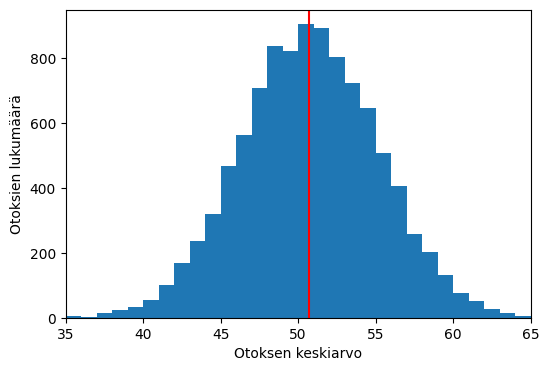

In [11]:
N = 10000 # otosten lukumäärä

keskiarvot = [] # muodostetaan tyhjä lista, johon tullaan keräämään otosten keskiarvot

for i in range(N):
    uusi_otos = np.random.choice(luvut, size=20, replace=False)
    keskiarvot = keskiarvot + [uusi_otos.mean()]

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(keskiarvot, bins=np.arange(30,70,1))
ax.set_xlim([35,65])
korkeus = ax.get_ylim()[1]
ax.plot([ka,ka],[0,korkeus], color='#ff0000')
ax.set_ylim([0,korkeus])
ax.set_xlabel('Otoksen keskiarvo')
ax.set_ylabel('Otoksien lukumäärä')
plt.show()

Huomataan, että osassa otoksista keskiarvo on kauempana, osassa lähempänä koko joukon keskiarvoa (punainen viiva). Kuitenkin suuressa osassa otoksia keskiarvo on lähellä todellista keskiarvoa.

Jos siis poimin satunnaisen otoksen isommasta joukosta, on otoksen keskiarvo luultavasti lähellä koko joukon keskiarvoa. Intuitiivisesti tätä voisi perustella sillä, että kun otokseen tulee satunnaisesti lukuja, on osa näistä keskiarvoa pienempiä ja osa isompia, jolloin keskiarvoa laskettaessa nämä kumoavat toistensa vaikutuksen.

Toisaalta mitä suuremman otoksen poimin, sitä paremmin se luultavasti muistuttaa varsinaista populaatiota. Kokeillaan poimia kokoa 10, 30, 60 ja 100 olevia otoksia:

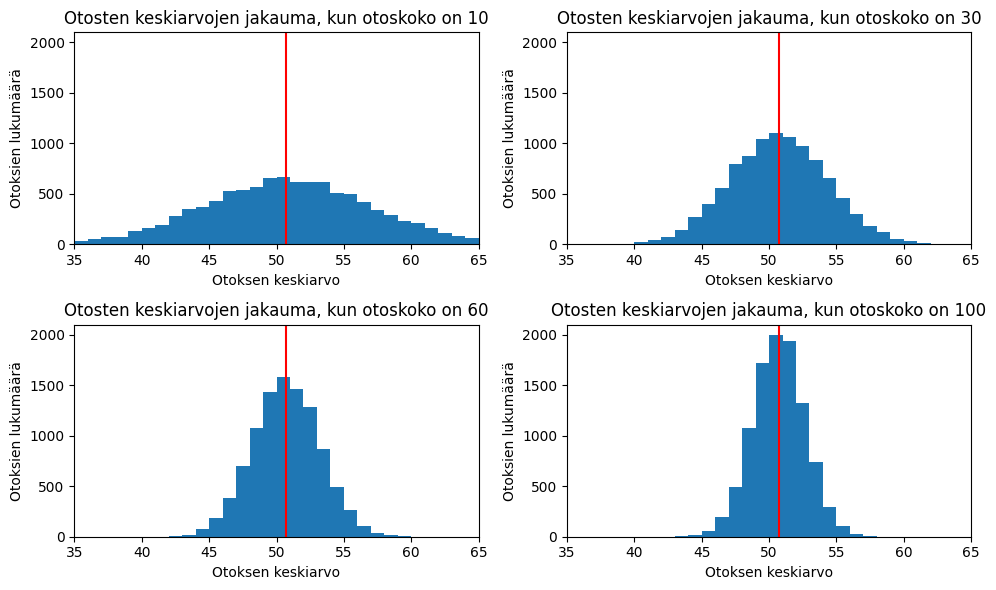

In [12]:
N = 10000 # otosten lukumäärä

# otoskoot
koko1 = 10
koko2 = 30
koko3 = 60
koko4 = 100

# muodostetaan tyhjät listat, joihon kerätään otosten keskiarvot
keskiarvot1 = []
keskiarvot2 = []
keskiarvot3 = []
keskiarvot4 = []

# muodostetaan otokset ja kerätään keskiarvot listoihin
for i in range(N):
    uusi_otos1 = np.random.choice(luvut, size=koko1, replace=False)
    keskiarvot1 = keskiarvot1 + [uusi_otos1.mean()]
    uusi_otos2 = np.random.choice(luvut, size=koko2, replace=False)
    keskiarvot2 = keskiarvot2 + [uusi_otos2.mean()]
    uusi_otos3 = np.random.choice(luvut, size=koko3, replace=False)
    keskiarvot3 = keskiarvot3 + [uusi_otos3.mean()]
    uusi_otos4 = np.random.choice(luvut, size=koko4, replace=False)
    keskiarvot4 = keskiarvot4 + [uusi_otos4.mean()]

# tehdään 2x2-kuva ja lisätään otoskeskiarvoja vastaavat histogrammit siihen
fig, ax = plt.subplots(2,2, figsize=(10,6))

ax[0,0].hist(keskiarvot1, bins=np.arange(30,70,1))
ax[0,0].set_xlim([35,65])
ax[0,0].set_xlabel('Otoksen keskiarvo')
ax[0,0].set_ylabel('Otoksien lukumäärä')
ax[0,0].set_title(f'Otosten keskiarvojen jakauma, kun otoskoko on {koko1}')

ax[0,1].hist(keskiarvot2, bins=np.arange(30,70,1))
ax[0,1].set_xlim([35,65])
ax[0,1].set_xlabel('Otoksen keskiarvo')
ax[0,1].set_ylabel('Otoksien lukumäärä')
ax[0,1].set_title(f'Otosten keskiarvojen jakauma, kun otoskoko on {koko2}')

ax[1,0].hist(keskiarvot3, bins=np.arange(30,70,1))
ax[1,0].set_xlim([35,65])
ax[1,0].set_xlabel('Otoksen keskiarvo')
ax[1,0].set_ylabel('Otoksien lukumäärä')
ax[1,0].set_title(f'Otosten keskiarvojen jakauma, kun otoskoko on {koko3}')

ax[1,1].hist(keskiarvot4, bins=np.arange(30,70,1))
ax[1,1].set_xlim([35,65])
ax[1,1].set_xlabel('Otoksen keskiarvo')
ax[1,1].set_ylabel('Otoksien lukumäärä')
ax[1,1].set_title(f'Otosten keskiarvojen jakauma, kun otoskoko on {koko4}')

# Säädetään kaavioiden korkeudet ja lisätään keskiarvoa vastaavat viivat
korkeus = max(ax[0,0].get_ylim()[1],ax[0,1].get_ylim()[1],ax[1,0].get_ylim()[1],ax[1,1].get_ylim()[1])
ax[0,1].plot([ka,ka],[0,korkeus], color='#ff0000')
ax[0,1].set_ylim([0,korkeus])
ax[0,0].plot([ka,ka],[0,korkeus], color='#ff0000')
ax[0,0].set_ylim([0,korkeus])
ax[1,0].plot([ka,ka],[0,korkeus], color='#ff0000')
ax[1,0].set_ylim([0,korkeus])
ax[1,1].plot([ka,ka],[0,korkeus], color='#ff0000')
ax[1,1].set_ylim([0,korkeus])

plt.tight_layout()
plt.show()

Histogrammin muodon ennustamiseen voi käyttää normaalijakaumaa, kuten alla olevista kaavioista nähdään. Ja tällöin siis voidaan käyttään normaalijakaumaa laskettaessa erilaisten otosten todennäköisyyksiä. Normaalijakaumaa vastaava käyrä on merkitty vihreällä.

In [ ]:
# Piirretään histogrammit vielä uudestaan niin, että niihin on lisätty vastaavat normaalijakaumat

# Populaation keskihajonta
hajonta = np.std(luvut)

# Normaalijakauman käyrää varten x:n arvot
x = np.arange(35,65,0.01)

# Tuodaan normaalijakauman tiheysfunktio
from scipy.stats import norm

# tehdään 2x2-kuva ja lisätään otoskeskiarvoja vastaavat histogrammit siihen
fig, ax = plt.subplots(2,2, figsize=(10,6))

ax[0,0].hist(keskiarvot1, bins=np.arange(30,70,1))
ax[0,0].set_xlim([35,65])
ax[0,0].set_xlabel('Otoksen keskiarvo')
ax[0,0].set_ylabel('Otoksien lukumäärä')
ax[0,0].set_title(f'Otosten keskiarvojen jakauma, kun otoskoko on {koko1}')
ax[0,0].plot(x,N*norm.pdf(x, loc=ka, scale=hajonta/np.sqrt(koko1)), color='#00cc00')

ax[0,1].hist(keskiarvot2, bins=np.arange(30,70,1))
ax[0,1].set_xlim([35,65])
ax[0,1].set_xlabel('Otoksen keskiarvo')
ax[0,1].set_ylabel('Otoksien lukumäärä')
ax[0,1].set_title(f'Otosten keskiarvojen jakauma, kun otoskoko on {koko2}')
ax[0,1].plot(x,N*norm.pdf(x, loc=ka, scale=hajonta/np.sqrt(koko2)), color='#00cc00')

ax[1,0].hist(keskiarvot3, bins=np.arange(30,70,1))
ax[1,0].set_xlim([35,65])
ax[1,0].set_xlabel('Otoksen keskiarvo')
ax[1,0].set_ylabel('Otoksien lukumäärä')
ax[1,0].set_title(f'Otosten keskiarvojen jakauma, kun otoskoko on {koko3}')
ax[1,0].plot(x,N*norm.pdf(x, loc=ka, scale=hajonta/np.sqrt(koko3)), color='#00cc00')

ax[1,1].hist(keskiarvot4, bins=np.arange(30,70,1))
ax[1,1].set_xlim([35,65])
ax[1,1].set_xlabel('Otoksen keskiarvo')
ax[1,1].set_ylabel('Otoksien lukumäärä')
ax[1,1].set_title(f'Otosten keskiarvojen jakauma, kun otoskoko on {koko4}')
ax[1,1].plot(x,N*norm.pdf(x, loc=ka, scale=hajonta/np.sqrt(koko4)), color='#00cc00')

# Säädetään kaavioiden korkeudet ja lisätään keskiarvoa vastaavat viivat
korkeus = max(ax[0,0].get_ylim()[1],ax[0,1].get_ylim()[1],ax[1,0].get_ylim()[1],ax[1,1].get_ylim()[1])
ax[0,1].plot([ka,ka],[0,korkeus], color='#ff0000')
ax[0,1].set_ylim([0,korkeus])
ax[0,0].plot([ka,ka],[0,korkeus], color='#ff0000')
ax[0,0].set_ylim([0,korkeus])
ax[1,0].plot([ka,ka],[0,korkeus], color='#ff0000')
ax[1,0].set_ylim([0,korkeus])
ax[1,1].plot([ka,ka],[0,korkeus], color='#ff0000')
ax[1,1].set_ylim([0,korkeus])

plt.tight_layout()
plt.show()

### p-arvo

**Esimerkki 1:** Mietitään nyt tilannetta toisesta näkökulmasta. Oletetaan, että poimit sadan henkilön otoksen kauppakeskuksen asiakkaista ja lasket keskimääräisen iän tässä otoksessa. Oletetaan, että se on 43 vuotta.
* Voitko päätellä, että kaikkien kauppakeskuksen asiakkaiden keski-ikä on 43 vuotta? Et, tuskin otokseen liittyy aina satunnaisuutta, kuten edellä huomattiin, jolloin otos tuskin vastaa täydellisesti koko populaatiota, josta otos on poimittu.
* Voitko olettaa, että kaikkien kauppakeskuksen asiakkaiden keski-ikä on melko lähellä 43 vuotta? Kyllä, tämä luultavasti on totta. Kuten edellä huomattiin, vaikkei otos vastaakaan täydellisesti koko populaatiota, niin luultavasti ne ovat kuitenkin melko lähellä toisiaan.

**Esimerkki 2:** Otetaan toinen esimerkki: Oletetaan, että työskentelet leipomossa, jossa valmistetaan leipiä. Leivän painon tulisi olla melko tarkasti 300 grammaa, jotta leipä olisi myyntikelpoinen. Käytännössä leipien painot vaihtelevat satunnaisesti: jotkut ovat muutaman gramman kevyempiä, toiset muutaman gramman painavampia. Keskimäärin leivän tulisi kuitenkin painaa 300 grammaa. Jos näin ei ole, niin leivän valmistusprosessissa on jossakin kohtaa vikaa.

Olet poiminut viidenkymmenen leivän otoksen ja punninnut nämä leivät ja laskenut keskimääräisen painon.
* Jos keskimääräinen paino on 300 grammaa, kaikki vaikuttaa olevan kunnossa.
* Jos keskimääräinen paino on 200 grammaa, niin jokin on selvästi vialla.
* Entä jos keskimääräinen paino on 295 grammaa? Onkohan kyse vain sattumasta (tässä otoksessa on sattumalta keskimääräistä kevyempiä leipiä) vai onko leipomon laitteiston säädöt pielessä?
* Yleisemmin voisi kysyä, missä kulkee raja, milloin keskimääräinen paino on epäilyttävän kaukana 300 grammasta eikä ole enää selitettävissä sattumalla ja toisaalta, milloin poikkeama on uskottavasti selitettävissä sattumalla. Onko raja yhden, viiden tai esim. kymmenen gramman kohdalla?

**Tilastotieteessä käytetään p-arvoa mittaamaan, onko otoksessa havaittu tilanne selitettävissä sattumalla vai ei.**

p-arvo tarkoittaa todennäköisyyttä sille, että otoksessa havaittu poikkeama selittyy sattumalla. Jos esimerkiksi yllä olevan leipomoesimerkin tapauksessa otoksen keskimääräisen leivän paino olisi 295 grammaa ja p-arvo olisi 0.003, niin tällöin todennäköisyys sille, että poikkeama (295 grammaa vs 300 grammaa) selittyy sattumalla, olisi 0.003 eli hyvin pieni. Johtopäätös olisi tällöin, että sattuma ei ole uskottava selitys, vaan leipomon prosessissa on jokin vialla.

Tyypillisesti p-arvoa verrataan arvoon 0.05.
* Mikäli p-arvo on pienempi kuin 0.05, emme usko sattumaan ja havaintoa pidetään tilastollisesti merkitsevänä.
* Mikäli p-arvo on suurempi kuin 0.05, kyseessä saattaa olla sattuma ja havaintoa ei pidetä tilastollisesti merkitsevänä.

**Otos ja populaatio:** Huomaa, että tarvitset p-arvoa, kun haluat selvittää, voiko otoksessa havaitun ominaisuuden yleistää koko populaatioon. Jos sinulla on jo koko populaatio, et tarvitse p-arvoa. Populaatio on siis se, mistä olet kiinnostunut ja otos on pieni satunnainen osa siitä.

## Kahden ryhmän keskiarvojen vertailu riippumattomien otosten t-testillä

Tarkastellaan ravintola-aineistoa:

In [13]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Oletetaan, että haluaisimme selvittää, onko miesten ja naisten antaman juomarahan välillä keskimäärin eroa.

Verrataan tilannetta tässä otoksessa:

In [14]:
tips.groupby('sex')['tip'].describe()

/var/folders/vp/7mhkr7t54_vdd29pd8k7k1840000gn/T/ipykernel_85411/2435202747.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['tip'].describe()


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


<Axes: xlabel='sex', ylabel='tip'>

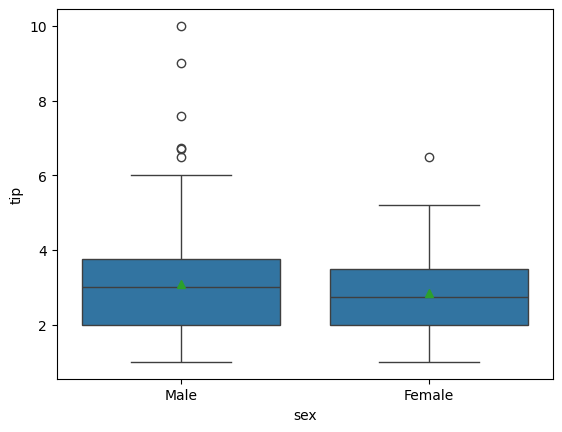

In [15]:
sns.boxplot(data=tips, x='sex', y='tip', showmeans=True)

Huomaamme, että otoksessa miesten antama juomaraha on keskimäärin hiukan suurempi kuin naisten antama juomaraha. Selittyykö tämä sattumalla? Eli olisiko niin, että jos voisimme tutkia kaikkia annettuja juomarahoja, niin miesten ja naisten välillä ei olisi eroa keskimääräistä eroa, mutta tähän nimenomaiseen otokseen on sattumalta tullut tavallista hiukan suurempia juomarahoja miehiltä ja tavallista pienempiä juomarahoja naisilta?

Selvitetään asiaa riippumattomien otosten t-testin avulla:

In [2]:
# tuodaan sopiva funktio scipy-kirjaston stats-moduulista
from scipy.stats import ttest_ind

In [22]:
# muodostetaan vertailtavat ryhmät
miehet = tips[tips["sex"]=="Male"]["tip"]
naiset = tips[tips["sex"]=="Female"]["tip"]

In [ ]:
# suoritetaan kahden riippumattoman muuttujan...

## Useamman ryhmän vertailu F-testillä

Tarkastellaan autoaineistoa:

In [17]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Haluaisimme selvittää, onko eri alueilta (Eurooppa, Japani ja Yhdysvallat) tulevien autojen kiihtyvyydessä tilastollisesti merkitsevää eroa.

Verrataan kiihtyvyysjakaumaa alueittain:

In [18]:
mpg.groupby('origin')['acceleration'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,16.787143,3.045687,12.2,14.5,15.7,18.90,24.8
japan,79.0,16.172152,1.954937,11.4,14.6,16.4,17.55,21.0
usa,249.0,15.033735,2.751112,8.0,13.0,15.0,16.90,22.2


<Axes: xlabel='origin', ylabel='acceleration'>

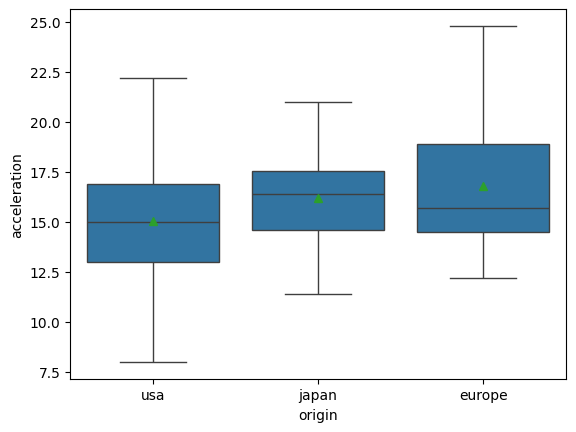

In [19]:
sns.boxplot(data=mpg, x='origin', y='acceleration', showmeans=True)

Yhdysvaltalaiset autot tässä otoksessa näyttäisivät kiihtyvän hiukan nopeammin kuin japanilaiset ja eurooppalaiset, mutta onko tämä yleistettävissä koko populaatioon?

Selvitetään asia varianssianalyysin avulla:

In [21]:
# tuodaan sopiva testi
from scipy.stats import f_oneway

In [24]:
# tiputetaan pois ne autot, joiden kiihtyvyyttä ei tunneta
mpg_dropna = mpg.dropna(subset=["acceleration"])

In [28]:
# muodostetaan vertailtavat ryhmät
usa_acc = mpg_dropna[mpg_dropna["origin"]=="usa"]["acceleration"]
japan_acc = mpg_dropna[mpg_dropna["origin"]=="japan"]["acceleration"]
europe_acc = mpg_dropna[mpg_dropna["origin"]=="europe"]["acceleration"]

In [29]:
# tehdään testi
f_oneway(usa_acc, japan_acc, europe_acc)

F_onewayResult(statistic=np.float64(14.308286988474672), pvalue=np.float64(1.0017746590110717e-06))

Nyt p-arvo hyvin pieni (0.000001), joten sattuma ei ole uskottava selitys.

Eri alueilta tulevien autoen kiihtyvyyksissä on tilastollisesti merkittävä ero (p<0.001).

## Muuttujien riippuvuuden tarkastelu $\chi^2$-testillä

Tarkastellaan taas ravintola-aineistoa.

In [30]:
# Tarkastellaan syöntiajan ja tupakoinnin yhteyttä:
df1 = pd.crosstab(tips['smoker'],tips['time'])
df1

time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


Tarkastellaan samaa ristiintaulukointia sarakeprosenttien avulla:

In [33]:
# Tarkastellaan syöntiajan ja tupakoinnin yhteyttä:
(pd.crosstab(tips['smoker'],tips['time'],normalize='columns')*100).style.format("{:.1f} %")

time,Lunch,Dinner
smoker,,
Yes,33.8 %,39.8 %
No,66.2 %,60.2 %


Huomataan, että päivällisellä tupakointi on hiukan yleisempää kuin lounaalla. Voisiko tämä kuitenkin johtua sattumasta vai onko ero merkitsevä? Tehdään $\chi^2$-testi:

In [35]:
from scipy.stats import chi2_contingency

In [36]:
# tehdään testi
chi2_contingency(df1)

Chi2ContingencyResult(statistic=np.float64(0.5053733928754355), pvalue=np.float64(0.4771485672079724), dof=1, expected_freq=array([[ 25.91803279,  67.08196721],
       [ 42.08196721, 108.91803279]]))

Khii toiseen -testin mukaan riippuvuus ei ole merkitsevä (p=0.48). Sattuma saattaa selittää havainnon.

## Korrelaation merkitsevyys

Tarkastellaan taas autoja. Onko vuosimallin ja painon välillä yhteyttä? Tarkastellaan asiaa hajontakuvion ja korrelaation avulla:

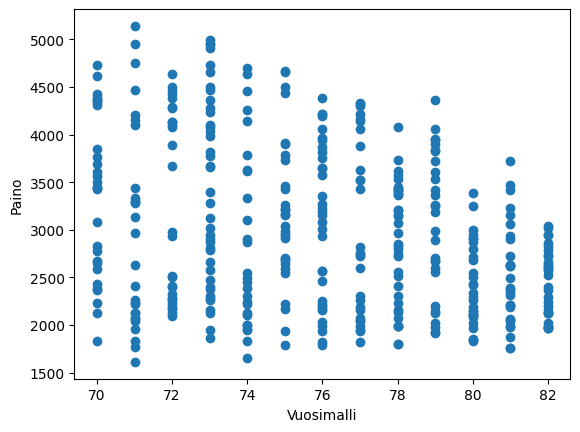

In [37]:
plt.scatter(mpg['model_year'], mpg['weight'])
plt.xlabel('Vuosimalli')
plt.ylabel('Paino')
plt.show()

In [38]:
mpg['model_year'].corr(mpg['weight'])

np.float64(-0.3065643342832898)

Vaikuttaa siltä, että keskimäärin autot ovat hiukan keventyneet. Voisiko sattuma kuitenkin selittää tämän?

In [39]:
from scipy.stats import pearsonr

In [40]:
# poistetaan puuttuvia arvoja sisältävät rivit
autot_dropna = mpg.dropna(subset=["model_year", "weight"])

In [41]:
pearsonr(autot_dropna["model_year"], autot_dropna["weight"])

PearsonRResult(statistic=np.float64(-0.3065643342832898), pvalue=np.float64(4.1635800890678975e-10))

Painon ja vuosimallin välillä on negatiivinen korrelattio (r=-0.31). Tämä on tilastollisesti merkitsevä (p<0.001). Sattuma ei siis ole uskottava selitys.